In [1]:
import pandas as pd
data_combine = pd.read_excel('d:/大学/大三上/数据挖掘/作业/final_data.xlsx')

In [2]:
param_lgmb = {}
param_lgmb['objective']='multiclass'
param_lgmb['num_class']=3
param_lgmb['metric']='multi_logloss'
param_lgmb['learning_rate']=0.1
param_lgmb['max_depth']=5
param_lgmb['seed']=2017

In [3]:
import lightgbm as lgbm
from sklearn.model_selection import train_test_split

In [172]:
train_data = data_combine[:-8392]
test_data = data_combine[-8392:]

In [5]:
train_y = train_data['author']

In [6]:
train_x = train_data.drop('author',axis=1)

In [8]:
lgbm_x_val,lgbm_x_dva,lgbm_y_val,lgbm_y_dva = train_test_split(train_x,train_y,test_size=0.33,random_state=2017)
lgbm_train = lgbm.Dataset(lgbm_x_val,lgbm_y_val)
lgbm_test = lgbm.Dataset(lgbm_x_dva,lgbm_y_dva,reference=lgbm_train)

In [91]:
data_combine = data_combine.drop(['text','word_split'],axis=1)

In [8]:
data_combine = data_combine.drop(['eap_word_feature','hpl_word_feature','mws_word_feature'],axis=1)

In [9]:
data_combine = data_combine.drop(['svd_char_1to5gram_'+str(i) for i in range(25)],axis=1)

In [10]:
data_combine = data_combine.drop(['svd_word_1to4gram_'+str(i) for i in range(25)],axis=1)

In [2]:
data_combine_copy = data_combine.copy

In [4]:
data_combine.columns

Index(['author', 'text_len', 'symbol_num', 'symbol_num_,', 'symbol_num_.',
       'symbol_num_?', 'symbol_num_:', 'symbol_num_'', 'stopword_num',
       'word_mean_length',
       ...
       'svd_char_dv_1to5gram_24', 'fasttext_0', 'fasttext_1', 'fasttext_2',
       'cnntext_0', 'cnntext_1', 'cnntext_2', 'rnntext_0', 'rnntext_1',
       'rnntext_2'],
      dtype='object', length=134)

In [14]:
data_combine = data_combine_copy()

In [66]:
data_combine = data_combine.drop(['svd_char_dv_1to5gram_'+str(i) for i in range(25)],axis=1)

In [5]:
data_combine = data_combine.drop(['fasttext_'+str(i) for i in range(3)],axis=1)

In [7]:
data_combine = data_combine.drop(['lda_topic_'+str(i) for i in range(10)],axis=1)
# 去掉lda后0.317307

ValueError: labels ['lda_topic_0' 'lda_topic_1' 'lda_topic_2' 'lda_topic_3' 'lda_topic_4'
 'lda_topic_5' 'lda_topic_6' 'lda_topic_7' 'lda_topic_8' 'lda_topic_9'] not contained in axis

In [151]:
data_combine = data_combine.drop(['svd_word_dv_1to5gram_'+str(i) for i in range(25)],axis=1)

ValueError: labels ['svd_word_dv_1to5gram_0' 'svd_word_dv_1to5gram_1' 'svd_word_dv_1to5gram_2'
 'svd_word_dv_1to5gram_3' 'svd_word_dv_1to5gram_4' 'svd_word_dv_1to5gram_5'
 'svd_word_dv_1to5gram_6' 'svd_word_dv_1to5gram_7' 'svd_word_dv_1to5gram_8'
 'svd_word_dv_1to5gram_9' 'svd_word_dv_1to5gram_10'
 'svd_word_dv_1to5gram_11' 'svd_word_dv_1to5gram_12'
 'svd_word_dv_1to5gram_13' 'svd_word_dv_1to5gram_14'
 'svd_word_dv_1to5gram_15' 'svd_word_dv_1to5gram_16'
 'svd_word_dv_1to5gram_17' 'svd_word_dv_1to5gram_18'
 'svd_word_dv_1to5gram_19' 'svd_word_dv_1to5gram_20'
 'svd_word_dv_1to5gram_21' 'svd_word_dv_1to5gram_22'
 'svd_word_dv_1to5gram_23' 'svd_word_dv_1to5gram_24'] not contained in axis

In [152]:
data_combine = data_combine.drop(['symbol_num_'+i for i in [',','.','?',':',"'"]],axis=1)
# 去掉lda+符号后去掉符号后0.319
# 单纯去掉符号0.317462
# 去掉lda加入id后0.318000

ValueError: labels ['symbol_num_,' 'symbol_num_.' 'symbol_num_?' 'symbol_num_:' "symbol_num_'"] not contained in axis

In [8]:
author_mapping_dict = {'EAP':0, 'HPL':1, 'MWS':2}
data_combine['author'] = data_combine['author'].map(author_mapping_dict)

In [96]:
data_combine = data_combine.drop('id',axis=1)

In [98]:
data_combine.columns
data_combine = data_combine.drop('dv_sa',axis=1)

In [9]:
data_combine.columns

Index(['author', 'text_len', 'symbol_num', 'symbol_num_,', 'symbol_num_.',
       'symbol_num_?', 'symbol_num_:', 'symbol_num_'', 'stopword_num',
       'word_mean_length',
       ...
       'svd_char_dv_1to5gram_24', 'fasttext_0', 'fasttext_1', 'fasttext_2',
       'cnntext_0', 'cnntext_1', 'cnntext_2', 'rnntext_0', 'rnntext_1',
       'rnntext_2'],
      dtype='object', length=134)

In [323]:
data_combine = data_combine.drop(['text_len','symbol_num','stopword_num','word_mean_length','char_num','unique_word',
                                 'sentence_sentiment','pos_word_num','neg_word_num','pos_word_max','neg_word_min'],axis=1)

In [ ]:
# 然后试试正则化后的表现，一般情况下应该是没用的，因为xgboost说到底是个决策树模型，不应该有关系
# 果然是这样子的，但是在其他模型中还是要注意一下这一点

In [17]:
import re

In [20]:
pattern = re.compile(r'id(.*?)')
data_combine['id'] = data_combine.id.apply(lambda x:int(re.sub(pattern=pattern,repl='',string=x)))

NameError: name 're' is not defined

In [15]:
train_data = data_combine[:-8392]

In [16]:
test_data = data_combine[-8392:]

In [17]:
author_mapping_dict = {'EAP':0, 'HPL':1, 'MWS':2}
train_y = train_data['author'].map(author_mapping_dict)

In [18]:
train_y = train_data['author']

In [21]:
train_data = train_data.drop(['author'],axis=1)

In [141]:
train_data = train_data.drop(['id'],axis=1)

ValueError: labels ['id'] not contained in axis

In [24]:
import xgboost as xgb

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
xgb_matrix = xgb.DMatrix(train_data,train_y)

In [11]:
xgb_matrix

In [28]:
# 关于xgboost的原理和python实现以及参数设置可以参考其官方文档，或者csdn上的博客，讲的都挺清楚的
# http://blog.csdn.net/zc02051126/article/details/46711047
param = {}
param['objective'] = 'multi:softprob'
param['eta'] = 0.01
param['max_depth'] = 3
param['silent'] = 1
param['num_class'] = 3
param['eval_metric'] = "mlogloss"
param['min_child_weight'] = 1
param['subsample'] = 0.8
param['colsample_bytree'] = 0.3
param['seed'] = 2017
param['gamma'] = 0.2
num_rounds=2993
model = xgb.cv(params=list(param.items()),dtrain=xgb_matrix,num_boost_round=num_rounds, early_stopping_rounds=10)

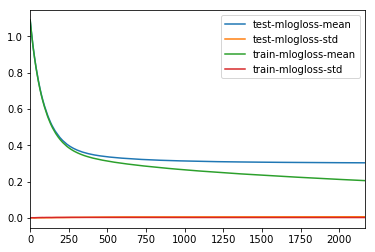

In [29]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(14,10))
model.plot()
plt.show()

In [19]:
model

In [20]:
test_data = test_data.drop(['author'],axis=1)

In [21]:
test_y = model.predict(xgb.DMatrix(test_data))

In [22]:
test_y

array([[  2.93719135e-02,   6.49068737e-03,   9.64137435e-01],
       [  9.93382454e-01,   4.66959877e-03,   1.94801309e-03],
       [  4.20167018e-03,   9.92947459e-01,   2.85088760e-03],
       ..., 
       [  9.22568083e-01,   6.08437471e-02,   1.65881254e-02],
       [  6.22636676e-02,   4.80188336e-03,   9.32934463e-01],
       [  7.04946741e-02,   9.28740382e-01,   7.64887140e-04]], dtype=float32)

In [23]:
result = pd.DataFrame(test_y)

In [24]:
result.to_csv('d:/result__.csv')

In [219]:
result_id = result_id.reset_index().drop('index',axis=1)

NameError: name 'result_id' is not defined

In [220]:
final_result = pd.concat([result_id,result],axis=1)

NameError: name 'result_id' is not defined

In [221]:
final_result.to_csv('d:/test.csv',index=False)

NameError: name 'final_result' is not defined

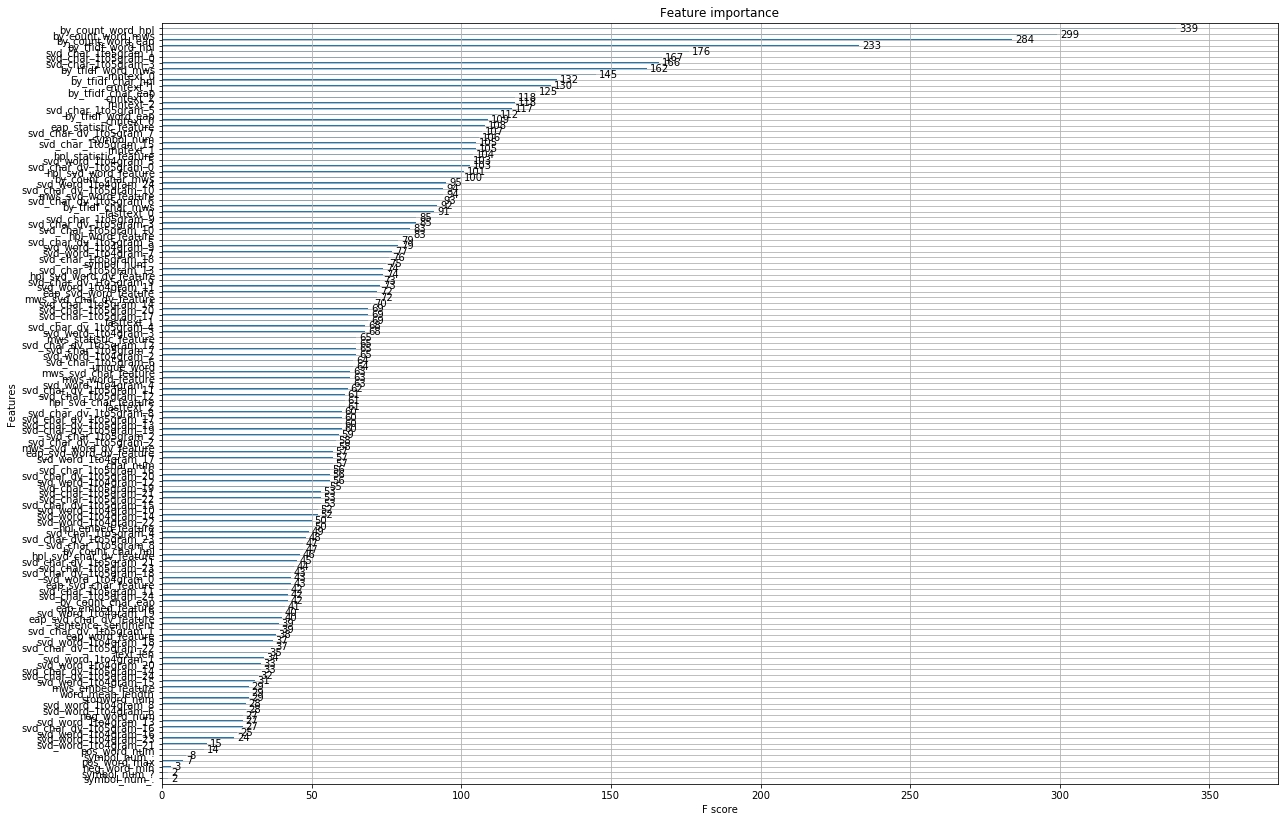

In [222]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(20,14))
ax = f.add_subplot(111)
xgb.plot_importance(model,ax=ax)
plt.show()

In [69]:
# 用单模型做到cv上的logloss在0.32左右，我自己觉得还可以吧，接下来也许可以试试ensemble了。
# 没想到早停和不早停差那么多效果
# 还是先看看特征的重要程度再说

In [16]:
writer = pd.ExcelWriter('D:/大学/大三上/数据挖掘/作业/final_data.xlsx')
data_combine.to_excel(writer,sheet_name='sheet1')
writer.save()